# 0. Intro
It's not unusual to see a kangaroo next to a human down in the down under.  However, it's unusual to see a giraffe next to a human down in the down under.  Being similar in certain aspects : long necks, tall structures, strong, and similar looking facial features, at a glance it may be easy to confuse a kangaroo with a giraffe. 

We don't want to see Aussies domesticate giraffes rather than kangaroos.

So lets use machine learning and technology to help us distinguish between a kangaroo and a giraffe.  In this project, we'll walk through the steps to build an image classifier machine learning model, using python and some external libraries such as tensorflow.



# 1. Install Dependencies and Setup


In [ ]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [6]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [9]:
import cv2
import imghdr

/var/folders/km/1fb7v2mx6g7f9458glpn08740000gn/T/ipykernel_10925/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [1]:
data_dir = 'data' 

In [2]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1262 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

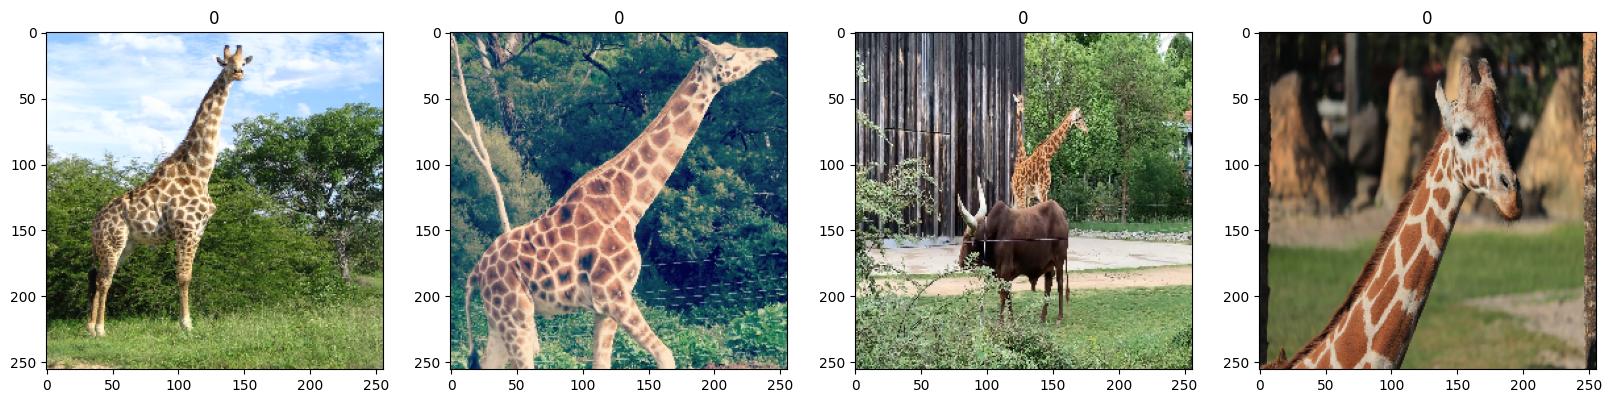

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 5. Split Data

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size

28

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
28/28 [==============================] - 11s 377ms/step - loss: 0.6891 - accuracy: 0.7422 - val_loss: 0.5281 - val_accuracy: 0.7539
Epoch 2/20
28/28 [==============================] - 11s 366ms/step - loss: 0.5220 - accuracy: 0.7589 - val_loss: 0.4880 - val_accuracy: 0.7227
Epoch 3/20
28/28 [==============================] - 12s 412ms/step - loss: 0.3886 - accuracy: 0.7924 - val_loss: 0.3440 - val_accuracy: 0.8242
Epoch 4/20
28/28 [==============================] - 13s 434ms/step - loss: 0.3531 - accuracy: 0.8304 - val_loss: 0.2633 - val_accuracy: 0.8945
Epoch 5/20
28/28 [==============================] - 13s 464ms/step - loss: 0.3248 - accuracy: 0.8661 - val_loss: 0.2926 - val_accuracy: 0.8398
Epoch 6/20
28/28 [==============================] - 16s 524ms/step - loss: 0.2863 - accuracy: 0.8717 - val_loss: 0.2929 - val_accuracy: 0.8828
Epoch 7/20
28/28 [==============================] - 11s 385ms/step - loss: 0.2216 - accuracy: 0.9118 - val_loss: 0.2156 - val_accuracy: 0.9180

# 8. Plot Performance

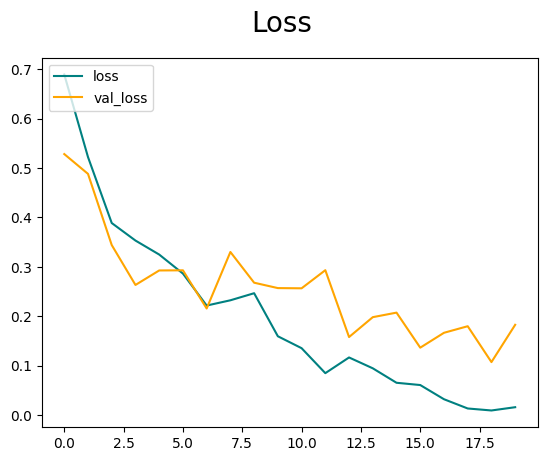

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

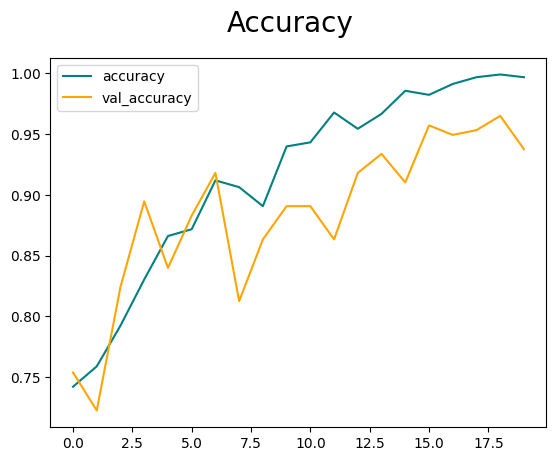

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8181818, shape=(), dtype=float32) tf.Tensor(0.8181818, shape=(), dtype=float32) tf.Tensor(0.92727274, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

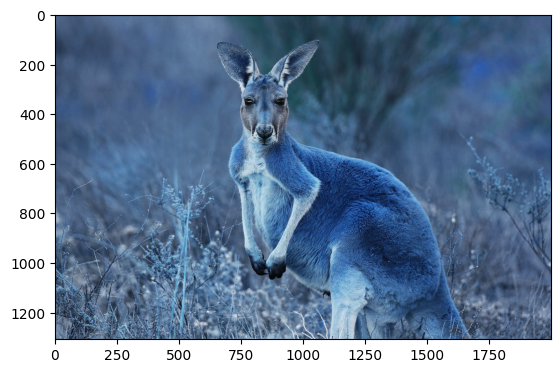

In [49]:
img = cv2.imread('sample-kangaroo.jpg')
plt.imshow(img)
plt.show()

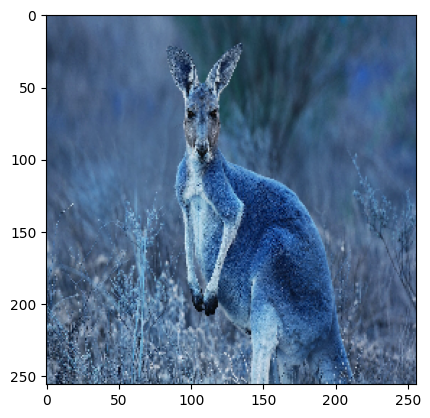

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [52]:
yhat

array([[0.97788465]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Kangaroo')
else:
    print(f'Giraffe')

Kangaroo
